In [1]:
import sys
#!{sys.executable} -m pip install efficientnet
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [2]:
# Get pretrained model 
from tensorflow.keras.applications.efficientnet import EfficientNetB0,preprocess_input,decode_predictions
from tensorflow.keras.preprocessing import image

# Get Connection
import boto3
from boto3 import Session

session = Session()
credentials = session.get_credentials()

#aws access credentials
current_credentials = credentials.get_frozen_credentials()

client = boto3.client(
    's3',
    aws_access_key_id=current_credentials.access_key,
    aws_secret_access_key=current_credentials.secret_key,
    aws_session_token=current_credentials.token)

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


In [3]:
bucket_name = 'tellisa-collage-gan'
img_inst = client.get_object(Bucket=bucket_name,Key='collage_gan/train/_.lunatico.__pic#0.jpg')

#https://www.analyticsvidhya.com/blog/2022/07/recommending-similar-images-using-image-embedding/

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
from PIL import Image
from io import BytesIO
import io

In [6]:

img_inst = Image.open(io.BytesIO(img_inst['Body'].read()))

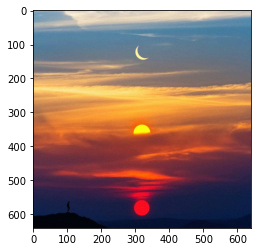

In [7]:
plt.imshow(img_inst,cmap=plt.cm.binary)

In [8]:
model = EfficientNetB0(include_top = False, weights = 'imagenet', pooling='avg')
x = image.img_to_array(img_inst)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)
preds = model.predict(x)
curr_df = pd.DataFrame(preds[0]).T
curr_df

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,-0.073504,-0.081529,-0.150256,-0.039397,-0.196335,-0.05843,0.089128,-0.125144,-0.161661,-0.073682,...,-0.04779,-0.013145,0.001945,-0.036383,-0.208646,-0.152522,-0.067945,-0.050996,0.012269,-0.137268
